In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [2]:
def log_rmse(y1, y2):
    return np.sqrt(mean_squared_error(np.log(y1), np.log(y2)))

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

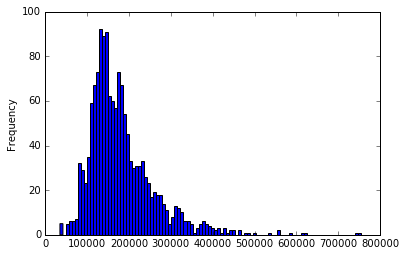

In [4]:
df.SalePrice.plot.hist(bins=100)

In [95]:
features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']
features = list(df.select_dtypes(['int64', 'float64']).columns.values)
features.remove('Id')
features.remove('SalePrice')

In [96]:
for feature in features:
    for d in [df, test]:
        d.fillna(d[feature].dropna().mean(), inplace=True)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df.SalePrice, test_size=0.3, random_state=0)

In [98]:
m = DecisionTreeRegressor(random_state=0)

In [99]:
cross_val_score(DecisionTreeRegressor(random_state=0),
                df[features],
                df.SalePrice,
                scoring=lambda estimator, X, y: log_rmse(estimator.predict(X), y),
                cv=10).mean()

0.20752718348847496

In [100]:
m = DecisionTreeRegressor(random_state=0)
m.fit(X_train[features], y_train)
log_rmse(m.predict(X_test), y_test)

0.1974787715230388

In [101]:
def submit(predict):
    test['SalePrice'] = predict(test)
    test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

In [102]:
m = DecisionTreeRegressor(random_state=0)
m.fit(df[features], df.SalePrice)
submit(lambda df: m.predict(df[features]))